In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv("insurance.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [72]:
# Binary class or Two class problem


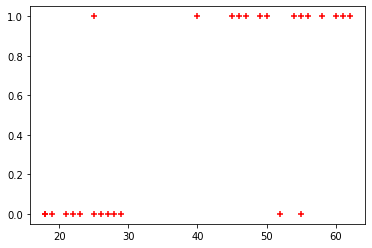

In [73]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')


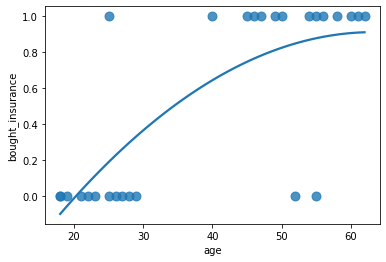

In [74]:
ax = sns.regplot(x=df.age, y=df.bought_insurance, scatter_kws={"s": 80}, data=df,
                 order=2, ci=None)

In [75]:
from sklearn.model_selection import train_test_split


In [76]:
X = df.iloc[:, 0].values.reshape(-1, 1)
Y = df.iloc[:, 1].values

In [77]:
X

array([[22],
       [25],
       [47],
       [52],
       [46],
       [56],
       [55],
       [60],
       [62],
       [61],
       [18],
       [28],
       [27],
       [29],
       [49],
       [55],
       [25],
       [58],
       [19],
       [18],
       [21],
       [26],
       [40],
       [45],
       [50],
       [54],
       [23]])

In [78]:
Y

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0])

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.8)


In [80]:
X_train

array([[28],
       [60],
       [18],
       [61],
       [55],
       [18],
       [49],
       [56],
       [23],
       [21],
       [26],
       [19],
       [47],
       [25],
       [54],
       [62],
       [45],
       [58],
       [40],
       [29],
       [55]])

In [81]:
y_train

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [82]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [83]:
model.fit(X_train, y_train)

LogisticRegression()

In [84]:

X_test

array([[27],
       [25],
       [46],
       [52],
       [50],
       [22]])

In [85]:
y_predicted = model.predict(X_test)


In [86]:
prob = model.predict_proba(X_test)

# Try till here----

In [87]:
print('Test data', 'Actual ', 'Prob of not getting insu', 'Prob of gett insu')
for i in range(len(prob)):
    print(X_test[i], y_test[i], round(prob[i][0],3), round(prob[i][1],3))
    

Test data Actual  Prob of not getting insu Prob of gett insu
[27] 0 0.788 0.212
[25] 0 0.831 0.169
[46] 1 0.201 0.799
[52] 0 0.097 0.903
[50] 1 0.125 0.875
[22] 0 0.883 0.117


In [88]:
# Can we Estimate Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [89]:
model.fit(X_train, y_train)

LinearRegression()

In [90]:
y_predicted_linear = model.predict(X_test)

In [91]:
y_predicted_linear

array([0.25869394, 0.21211644, 0.70118017, 0.84091267, 0.79433517,
       0.1422502 ])

In [92]:
# Scatterd plot

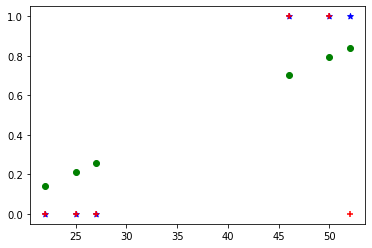

In [94]:
plt.scatter(X_test,y_predicted,marker='*',color='blue')
plt.scatter(X_test,y_test,marker='+',color='red')

plt.scatter(X_test,y_predicted_linear,color='green')

In [218]:
model.score(X_test,y_test)


0.8333333333333334

In [219]:
y_predicted


array([1, 0, 0, 1, 0, 1])

In [220]:
X_test

array([[46],
       [18],
       [22],
       [58],
       [40],
       [62]])

In [221]:
model.coef_

array([[0.12145302]])

In [222]:
model.intercept_


array([-4.97141963])

In [223]:

import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [224]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [225]:
age = 35
prediction_function(age)

0.4850044983805899

In [226]:
age = 43
prediction_function(age)

0.568565299077705

In [227]:
import pandas as pd
from matplotlib import pyplot as plt

In [228]:
df = pd.read_csv("hr.csv")


In [229]:
quit = df[df.quit==1]
quit.shape

(3571, 10)

In [230]:
retained = df[df.quit==0]
retained.shape

(11428, 10)

<AxesSubplot:xlabel='salary'>

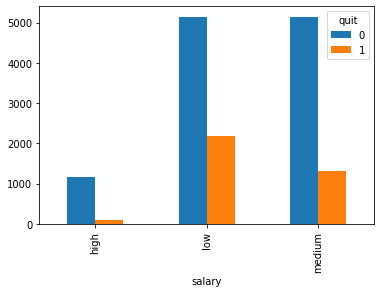

In [231]:
pd.crosstab(df.salary,df.quit).plot(kind='bar')


<AxesSubplot:xlabel='Department'>

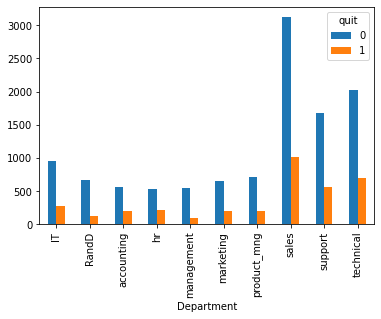

In [232]:
pd.crosstab(df.Department,df.quit).plot(kind='bar')


In [233]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [234]:
salary = {"low":  0, "medium": 1, "high":2}

In [235]:
df_cleaned = df.replace(salary)


In [236]:
department={}
cnt = 0
for dpt in df.Department.unique():
    department[dpt] = cnt
    cnt += 1

In [237]:
department

{'sales': 0,
 'accounting': 1,
 'hr': 2,
 'technical': 3,
 'support': 4,
 'management': 5,
 'IT': 6,
 'product_mng': 7,
 'marketing': 8,
 'RandD': 9}

In [238]:
df_cleaned = df_cleaned.replace(department)


In [239]:
df_cleaned.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [240]:
df_cleaned.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,4,0
14995,0.37,0.48,2,160,3,0,1,0,4,0
14996,0.37,0.53,2,143,3,0,1,0,4,0
14997,0.11,0.96,6,280,4,0,1,0,4,0
14998,0.37,0.52,2,158,3,0,1,0,4,0


In [241]:
# X = df_cleaned.iloc[:, 0:5, 7:9].values  # values converts it into a numpy array
Y = df_cleaned.iloc[:, 6].values

In [242]:
Y.shape

(14999,)

In [243]:
X = df_cleaned.drop(columns=['quit'])

In [244]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,0,0
1,0.80,0.86,5,262,6,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0
4,0.37,0.52,2,159,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,4,0
14995,0.37,0.48,2,160,3,0,0,4,0
14996,0.37,0.53,2,143,3,0,0,4,0
14997,0.11,0.96,6,280,4,0,0,4,0


In [245]:
Y.shape

(14999,)

In [246]:
X.shape

(14999, 9)

In [247]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)


In [248]:
X_train.shape

(10499, 9)

In [249]:
y_train.shape

(10499,)

In [250]:
X_test.shape

(4500, 9)

In [251]:
y_test.shape

(4500,)

In [252]:
model = LogisticRegression()  # create object for the class
model.fit(X_train, y_train)

/home/amarnath/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [253]:
pred=model.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [254]:
model.score(X_test,y_test)

0.8086666666666666

In [255]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [256]:
model.predict_proba(X_test)[:,1]> .5


array([False, False, False, ..., False, False, False])

In [257]:
# Use score method to get accuracy of model
score = model.score(X_test, y_test)
print(score)

0.8086666666666666


In [258]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [259]:
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

[[3233  217]
 [ 644  406]]


In [260]:
y_test.shape

(4500,)

In [261]:
model.classes_

array([0, 1])

In [262]:
# Follow the order
labels_dic = {0:'retension', 1:'quit'}

x_labels = []
y_labels = []
for mod in model.classes_:
    x_labels.append(labels_dic[mod])
    y_labels.append(labels_dic[mod])


In [263]:

x_labels

['retension', 'quit']

In [264]:
y_labels

['retension', 'quit']

In [265]:
from sklearn.metrics import classification_report, confusion_matrix


[[3233  217]
 [ 644  406]]


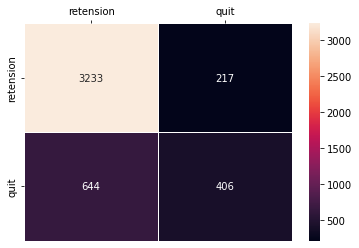

In [266]:
print(cm)
# sns.heatmap(cm, linewidths=1, annot=True, fmt='g')
ax = sns.heatmap(cm, linewidths=1,annot=True, fmt='g', xticklabels=x_labels, yticklabels=y_labels)
ax.xaxis.set_ticks_position('top')

In [267]:
import numpy as np

[[3233  217]
 [ 644  406]]


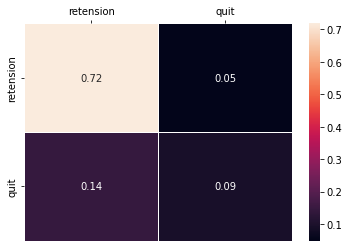

In [268]:
print(cm)

cmn = cm.astype('float') / cm.sum()
ax = sns.heatmap(cmn, linewidths=1,annot=True, fmt='.2f', xticklabels=x_labels, yticklabels=y_labels)
ax.xaxis.set_ticks_position('top')

In [269]:
print(classification_report(y_test, pred, target_names=x_labels))

              precision    recall  f1-score   support

   retension       0.83      0.94      0.88      3450
        quit       0.65      0.39      0.49      1050

    accuracy                           0.81      4500
   macro avg       0.74      0.66      0.68      4500
weighted avg       0.79      0.81      0.79      4500



In [270]:
from sklearn.metrics import roc_curve



In [271]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred, pos_label=1)

In [272]:
fpr1, tpr1, thresh1

(array([0.        , 0.06289855, 1.        ]),
 array([0.        , 0.38666667, 1.        ]),
 array([2, 1, 0]))

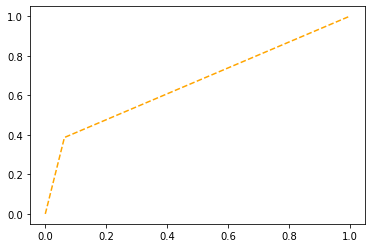

In [273]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')


In [274]:
sensitivity = cm[0][0]/(cm[0][0]+cm[1][1])

In [275]:
sensitivity

0.8884308876064853

In [276]:
specificity = cm[1][1]/(cm[0][0]+cm[1][1])

In [277]:
specificity

0.1115691123935147

In [278]:
sensitivity + specificity

1.0

In [290]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [291]:
pred.shape

(4500,)

In [292]:
precision = precision_score(y_test, pred)
precision

0.651685393258427

In [293]:
recall = recall_score(y_test, pred)
recall

0.38666666666666666

In [279]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [280]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=2)
# report performance
print(scores)

[0.796      0.78733333 0.78866667 0.78733333 0.802      0.78133333
 0.78533333 0.75333333 0.802      0.79919947]


In [281]:
kf = KFold(n_splits=25, random_state=5, shuffle=True)


kf



KFold(n_splits=25, random_state=5, shuffle=True)

In [296]:
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot



>1 mean=0.7899 se=0.005
>2 mean=0.7914 se=0.003
>3 mean=0.7915 se=0.002
>4 mean=0.7907 se=0.002


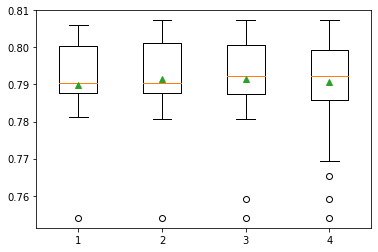

In [308]:
model = LogisticRegression()
repeats = range(1,5)
def evaluate_model(x, y, r):

    kf = RepeatedKFold(n_splits=10, n_repeats=r, random_state=1)

    
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=kf, n_jobs=-1)
    return scores


results = list()
for r in repeats:
    scores = evaluate_model(X, Y, r)
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))

    results.append(scores)

pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

In [295]:
# Maximizing precision will minimize the number false positives, 
# whereas maximizing the recall will minimize the number of false negatives.

In [202]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]


TRAIN: [    0     1     2 ... 14996 14997 14998]
TEST: [    8    15    17    19    33    40    51    57    75    77   111   125
   136   163   184   212   227   236   284   299   317   321   399   401
   404   448   454   468   482   507   553   555   584   628   644   649
   651   656   667   681   687   701   797   850   889   902   942   952
   959   967  1023  1037  1043  1059  1073  1074  1101  1126  1163  1173
  1177  1181  1213  1245  1325  1326  1330  1341  1377  1393  1411  1435
  1437  1487  1504  1511  1627  1641  1644  1682  1685  1696  1753  1759
  1781  1793  1808  1837  1883  1886  1896  1930  1933  1937  1990  2021
  2056  2065  2095  2159  2192  2223  2290  2292  2297  2315  2327  2423
  2452  2453  2480  2506  2575  2597  2616  2621  2682  2684  2706  2737
  2834  2888  2929  2945  2964  2975  2983  3024  3133  3141  3143  3165
  3191  3208  3228  3269  3272  3279  3390  3394  3395  3414  3427  3434
  3461  3464  3493  3510  3519  3521  3537  3543  3547  3555  3557  3

In [309]:
ans = sns.load_dataset("anscombe")
# ax = sns.regplot(x="x", y="y", data=ans.loc[ans.dataset == "II"],

In [310]:
ans

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


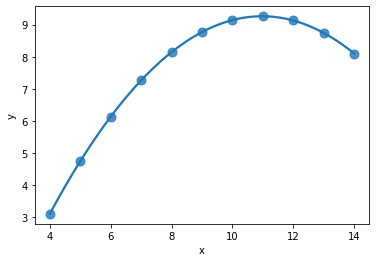

In [315]:
ax = sns.regplot(x="x", y="y", data=ans.loc[ans.dataset == "II"],
                 scatter_kws={"s": 80},
                 order=2, ci=None)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.